In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time



hdrs = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                 "AppleWebKit/537.36 (KHTML, like Gecko) "
                 "Chrome/120.0 Safari/537.36"
}



def get_price(val):
    if not val: 
        return None
    val = val.strip()
    nums = re.findall(r"[\d\.]+", val)
    if not nums:
        return None
    nums = float(nums[0])
    if "Crore" in val:
        return nums * 10000000
    elif "Lakh" in val:
        return nums * 100000
    return nums


def size_convert(sz):
    if not sz:
        return None,None,None
    mt = re.search(r"([\d\.]+)\s*(Marla|Kanal|Sq)", sz)
    if not mt:  return None,None,None
    sz_val = float(mt.group(1))
    un = mt.group(2)
    if un == "Marla":
        sqft = sz_val*272.25
    elif un == "Kanal":
        sqft = sz_val*5445
    else:
        sqft = sz_val
    return sz_val,un,sqft



def scrap_pg(pg):
    url = f"https://www.zameen.com/Houses_Property/Lahore-1-{pg}.html"
    print("Scraping page:", pg)
    respone = requests.get(url, headers = hdrs)
    if respone.status_code != 200:
        print("failed:", pg, respone.status_code)
        return []

    soupp = BeautifulSoup(respone.text,"html.parser")
    cards = soupp.find_all("li",{"aria-label":"Listing"})
    lsts = []
    for c in cards:
        try:
            ttl = c.find("h2",{"aria-label":"Title"}).get_text(strip=True)
        except:
            ttl=None
        try:
            pr = c.find("span",{"aria-label":"Price"}).get_text(strip=True)
            price_val = get_price(pr)
        except:
            pr=None
            price_val=None
        try:
            loca = c.find("div",{"aria-label":"Location"}).get_text(strip=True)
        except:
            loca=None
        try:
            beds = c.find("span",{"aria-label":"Beds"})
            beds = int(beds.get_text(strip=True)) if beds else None
        except:
            beds=None
        try:
            baths = c.find("span",{"aria-label":"Baths"})
            baths = int(baths.get_text(strip=True)) if baths else None
        except:
            baths=None
        try:
            sspan = c.find("span", string=re.compile(r"(Marla|Kanal|Sq)",re.I))
            stxt = sspan.get_text(strip=True) if sspan else None
            a_s, a_u, a_ft = size_convert(stxt) if stxt else (None,None,None)
        except:
            a_s=a_u=a_ft=None

        lsts.append({
            "ttl": ttl,
            "pr": pr,
            "price_val": price_val,
            "loca": loca,
            "beds": beds,
            "baths": baths,
            "a_s": a_s,
            "a_u": a_u,
            "a_ft": a_ft
        })
    print("found", len(lsts), "on page", pg)
    return lsts





all_lsts=[]
for p in range(1,101):
    x = scrap_pg(p)
    all_lsts.extend(x)
    time.sleep(2)



df = pd.DataFrame(all_lsts)


df = df.rename(columns={
    "ttl": "Title",
    "pr": "Price_Text",
    "price_val": "Price_Numeric",
    "loca": "Location",
    "beds": "Bedrooms",
    "baths": "Bathrooms",
    "a_s": "Area_Size",
    "a_u": "Area_Unit",
    "a_ft": "Area_Sqft"
})


df.to_csv("zameen.csv",index=False)

print("total rows:", len(df))


2025-09-27 11:39:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 1


2025-09-27 11:39:16 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-1.html HTTP/1.1" 200 None


found 25 on page 1


2025-09-27 11:39:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 2


2025-09-27 11:39:19 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-2.html HTTP/1.1" 200 None


found 25 on page 2


2025-09-27 11:39:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 3


2025-09-27 11:39:23 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-3.html HTTP/1.1" 200 None


found 25 on page 3


2025-09-27 11:39:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 4


2025-09-27 11:39:27 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-4.html HTTP/1.1" 200 None


found 25 on page 4


2025-09-27 11:39:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 5


2025-09-27 11:39:31 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-5.html HTTP/1.1" 200 None


found 25 on page 5


2025-09-27 11:39:34 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 6


2025-09-27 11:39:35 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-6.html HTTP/1.1" 200 None


found 25 on page 6


2025-09-27 11:39:37 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 7


2025-09-27 11:39:38 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-7.html HTTP/1.1" 200 None


found 25 on page 7


2025-09-27 11:39:41 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 8


2025-09-27 11:39:42 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-8.html HTTP/1.1" 200 None


found 25 on page 8


2025-09-27 11:39:45 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 9


2025-09-27 11:39:46 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-9.html HTTP/1.1" 200 None


found 25 on page 9


2025-09-27 11:39:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 10


2025-09-27 11:39:50 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-10.html HTTP/1.1" 200 None


found 25 on page 10


2025-09-27 11:39:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 11


2025-09-27 11:39:53 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-11.html HTTP/1.1" 200 None


found 25 on page 11


2025-09-27 11:39:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 12


2025-09-27 11:39:57 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-12.html HTTP/1.1" 200 None


found 25 on page 12


2025-09-27 11:40:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 13


2025-09-27 11:40:01 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-13.html HTTP/1.1" 200 None


found 25 on page 13


2025-09-27 11:40:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 14


2025-09-27 11:40:05 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-14.html HTTP/1.1" 200 None


found 25 on page 14


2025-09-27 11:40:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 15


2025-09-27 11:40:09 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-15.html HTTP/1.1" 200 None


found 25 on page 15


2025-09-27 11:40:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 16


2025-09-27 11:40:13 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-16.html HTTP/1.1" 200 None


found 25 on page 16


2025-09-27 11:40:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 17


2025-09-27 11:40:17 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-17.html HTTP/1.1" 200 None


found 25 on page 17


2025-09-27 11:40:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 18


2025-09-27 11:40:21 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-18.html HTTP/1.1" 200 None


found 25 on page 18


2025-09-27 11:40:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 19


2025-09-27 11:40:24 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-19.html HTTP/1.1" 200 None


found 25 on page 19


2025-09-27 11:40:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 20


2025-09-27 11:40:28 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-20.html HTTP/1.1" 200 None


found 25 on page 20


2025-09-27 11:40:31 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 21


2025-09-27 11:40:32 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-21.html HTTP/1.1" 200 None


found 25 on page 21


2025-09-27 11:40:35 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 22


2025-09-27 11:40:36 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-22.html HTTP/1.1" 200 None


found 25 on page 22


2025-09-27 11:40:39 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 23


2025-09-27 11:40:40 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-23.html HTTP/1.1" 200 None


found 25 on page 23


2025-09-27 11:40:43 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 24


2025-09-27 11:40:44 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-24.html HTTP/1.1" 200 None


found 25 on page 24


2025-09-27 11:40:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 25


2025-09-27 11:40:48 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-25.html HTTP/1.1" 200 None


found 25 on page 25


2025-09-27 11:40:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 26


2025-09-27 11:40:52 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-26.html HTTP/1.1" 200 None


found 25 on page 26


2025-09-27 11:40:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 27


2025-09-27 11:40:55 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-27.html HTTP/1.1" 200 None


found 25 on page 27


2025-09-27 11:40:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 28


2025-09-27 11:40:59 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-28.html HTTP/1.1" 200 None


found 25 on page 28


2025-09-27 11:41:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 29


2025-09-27 11:41:02 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-29.html HTTP/1.1" 200 None


found 25 on page 29


2025-09-27 11:41:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 30


2025-09-27 11:41:06 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-30.html HTTP/1.1" 200 None


found 25 on page 30


2025-09-27 11:41:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 31


2025-09-27 11:41:10 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-31.html HTTP/1.1" 200 None


found 25 on page 31


2025-09-27 11:41:13 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 32


2025-09-27 11:41:14 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-32.html HTTP/1.1" 200 None


found 25 on page 32


2025-09-27 11:41:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 33


2025-09-27 11:41:18 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-33.html HTTP/1.1" 200 None


found 25 on page 33


2025-09-27 11:41:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 34


2025-09-27 11:41:21 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-34.html HTTP/1.1" 200 None


found 25 on page 34


2025-09-27 11:41:24 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 35


2025-09-27 11:41:25 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-35.html HTTP/1.1" 200 None


found 25 on page 35


2025-09-27 11:41:28 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 36


2025-09-27 11:41:29 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-36.html HTTP/1.1" 200 None


found 25 on page 36


2025-09-27 11:41:32 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 37


2025-09-27 11:41:33 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-37.html HTTP/1.1" 200 None


found 25 on page 37


2025-09-27 11:41:35 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 38


2025-09-27 11:41:36 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-38.html HTTP/1.1" 200 None


found 25 on page 38


2025-09-27 11:41:39 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 39


2025-09-27 11:41:40 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-39.html HTTP/1.1" 200 None


found 25 on page 39


2025-09-27 11:41:43 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 40


2025-09-27 11:41:44 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-40.html HTTP/1.1" 200 None


found 25 on page 40


2025-09-27 11:41:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 41


2025-09-27 11:41:48 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-41.html HTTP/1.1" 200 None


found 25 on page 41


2025-09-27 11:41:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 42


2025-09-27 11:41:51 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-42.html HTTP/1.1" 200 None


found 25 on page 42


2025-09-27 11:41:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 43


2025-09-27 11:41:55 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-43.html HTTP/1.1" 200 None


found 25 on page 43


2025-09-27 11:41:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 44


2025-09-27 11:42:00 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-44.html HTTP/1.1" 200 None


found 25 on page 44


2025-09-27 11:42:02 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 45


2025-09-27 11:42:03 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-45.html HTTP/1.1" 200 None


found 25 on page 45


2025-09-27 11:42:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 46


2025-09-27 11:42:07 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-46.html HTTP/1.1" 200 None


found 25 on page 46


2025-09-27 11:42:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 47


2025-09-27 11:42:11 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-47.html HTTP/1.1" 200 None


found 25 on page 47


2025-09-27 11:42:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 48


2025-09-27 11:42:15 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-48.html HTTP/1.1" 200 None


found 25 on page 48


2025-09-27 11:42:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 49


2025-09-27 11:42:19 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-49.html HTTP/1.1" 200 None


found 25 on page 49


2025-09-27 11:42:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 50


2025-09-27 11:42:24 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-50.html HTTP/1.1" 200 None


found 25 on page 50


2025-09-27 11:42:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 51


2025-09-27 11:42:27 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-51.html HTTP/1.1" 200 None


found 25 on page 51


2025-09-27 11:42:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 52


2025-09-27 11:42:31 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-52.html HTTP/1.1" 200 None


found 25 on page 52


2025-09-27 11:42:34 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 53


2025-09-27 11:42:35 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-53.html HTTP/1.1" 200 None


found 25 on page 53


2025-09-27 11:42:38 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 54


2025-09-27 11:42:39 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-54.html HTTP/1.1" 200 None


found 25 on page 54


2025-09-27 11:42:41 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 55


2025-09-27 11:42:42 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-55.html HTTP/1.1" 200 None


found 25 on page 55


2025-09-27 11:42:45 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 56


2025-09-27 11:42:46 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-56.html HTTP/1.1" 200 None


found 25 on page 56


2025-09-27 11:42:49 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 57


2025-09-27 11:42:50 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-57.html HTTP/1.1" 200 None


found 25 on page 57


2025-09-27 11:42:53 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 58


2025-09-27 11:42:54 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-58.html HTTP/1.1" 200 None


found 25 on page 58


2025-09-27 11:42:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 59


2025-09-27 11:42:58 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-59.html HTTP/1.1" 200 None


found 25 on page 59


2025-09-27 11:43:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 60


2025-09-27 11:43:01 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-60.html HTTP/1.1" 200 None


found 25 on page 60


2025-09-27 11:43:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 61


2025-09-27 11:43:05 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-61.html HTTP/1.1" 200 None


found 25 on page 61


2025-09-27 11:43:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 62


2025-09-27 11:43:09 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-62.html HTTP/1.1" 200 None


found 25 on page 62


2025-09-27 11:43:12 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 63


2025-09-27 11:43:13 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-63.html HTTP/1.1" 200 None


found 25 on page 63


2025-09-27 11:43:16 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 64


2025-09-27 11:43:17 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-64.html HTTP/1.1" 200 None


found 25 on page 64


2025-09-27 11:43:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 65


2025-09-27 11:43:21 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-65.html HTTP/1.1" 200 None


found 25 on page 65


2025-09-27 11:43:24 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 66


2025-09-27 11:43:25 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-66.html HTTP/1.1" 200 None


found 25 on page 66


2025-09-27 11:43:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 67


2025-09-27 11:43:28 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-67.html HTTP/1.1" 200 None


found 25 on page 67


2025-09-27 11:43:31 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 68


2025-09-27 11:43:32 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-68.html HTTP/1.1" 200 None


found 25 on page 68


2025-09-27 11:43:35 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 69


2025-09-27 11:43:36 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-69.html HTTP/1.1" 200 None


found 25 on page 69


2025-09-27 11:43:38 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 70


2025-09-27 11:43:39 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-70.html HTTP/1.1" 200 None


found 25 on page 70


2025-09-27 11:43:42 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 71


2025-09-27 11:43:44 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-71.html HTTP/1.1" 200 None


found 25 on page 71


2025-09-27 11:43:47 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 72


2025-09-27 11:43:48 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-72.html HTTP/1.1" 200 None


found 25 on page 72


2025-09-27 11:43:51 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 73


2025-09-27 11:43:52 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-73.html HTTP/1.1" 200 None


found 25 on page 73


2025-09-27 11:43:55 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 74


2025-09-27 11:43:56 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-74.html HTTP/1.1" 200 None


found 25 on page 74


2025-09-27 11:43:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 75


2025-09-27 11:44:00 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-75.html HTTP/1.1" 200 None


found 25 on page 75


2025-09-27 11:44:03 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 76


2025-09-27 11:44:04 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-76.html HTTP/1.1" 200 None


found 25 on page 76


2025-09-27 11:44:06 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 77


2025-09-27 11:44:07 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-77.html HTTP/1.1" 200 None


found 25 on page 77


2025-09-27 11:44:10 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 78


2025-09-27 11:44:11 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-78.html HTTP/1.1" 200 None


found 25 on page 78


2025-09-27 11:44:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 79


2025-09-27 11:44:15 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-79.html HTTP/1.1" 200 None


found 25 on page 79


2025-09-27 11:44:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 80


2025-09-27 11:44:19 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-80.html HTTP/1.1" 200 None


found 25 on page 80


2025-09-27 11:44:22 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 81


2025-09-27 11:44:23 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-81.html HTTP/1.1" 200 None


found 25 on page 81


2025-09-27 11:44:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 82


2025-09-27 11:44:27 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-82.html HTTP/1.1" 200 None


found 25 on page 82


2025-09-27 11:44:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 83


2025-09-27 11:44:31 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-83.html HTTP/1.1" 200 None


found 25 on page 83


2025-09-27 11:44:33 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 84


2025-09-27 11:44:34 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-84.html HTTP/1.1" 200 None


found 25 on page 84


2025-09-27 11:44:37 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 85


2025-09-27 11:44:38 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-85.html HTTP/1.1" 200 None


found 25 on page 85


2025-09-27 11:44:41 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 86


2025-09-27 11:44:42 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-86.html HTTP/1.1" 200 None


found 25 on page 86


2025-09-27 11:44:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 87


2025-09-27 11:44:45 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-87.html HTTP/1.1" 200 None


found 25 on page 87


2025-09-27 11:44:48 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 88


2025-09-27 11:44:49 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-88.html HTTP/1.1" 200 None


found 25 on page 88


2025-09-27 11:44:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 89


2025-09-27 11:44:53 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-89.html HTTP/1.1" 200 None


found 25 on page 89


2025-09-27 11:44:56 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 90


2025-09-27 11:44:57 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-90.html HTTP/1.1" 200 None


found 25 on page 90


2025-09-27 11:45:00 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 91


2025-09-27 11:45:01 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-91.html HTTP/1.1" 200 None


found 25 on page 91


2025-09-27 11:45:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 92


2025-09-27 11:45:05 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-92.html HTTP/1.1" 200 None


found 25 on page 92


2025-09-27 11:45:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 93


2025-09-27 11:45:09 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-93.html HTTP/1.1" 200 None


found 25 on page 93


2025-09-27 11:45:11 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 94


2025-09-27 11:45:12 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-94.html HTTP/1.1" 200 None


found 25 on page 94


2025-09-27 11:45:15 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 95


2025-09-27 11:45:16 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-95.html HTTP/1.1" 200 None


found 25 on page 95


2025-09-27 11:45:19 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 96


2025-09-27 11:45:21 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-96.html HTTP/1.1" 200 None


found 25 on page 96


2025-09-27 11:45:23 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 97


2025-09-27 11:45:24 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-97.html HTTP/1.1" 200 None


found 25 on page 97


2025-09-27 11:45:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 98


2025-09-27 11:45:28 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-98.html HTTP/1.1" 200 None


found 25 on page 98


2025-09-27 11:45:31 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 99


2025-09-27 11:45:32 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-99.html HTTP/1.1" 200 None


found 25 on page 99


2025-09-27 11:45:35 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.zameen.com:443


Scraping page: 100


2025-09-27 11:45:36 [urllib3.connectionpool] DEBUG: https://www.zameen.com:443 "GET /Houses_Property/Lahore-1-100.html HTTP/1.1" 200 None


found 25 on page 100
total rows: 2220


In [27]:
import pandas as pd 
import numpy as np 

zz=pd.read_csv("zameen.csv")   

def fix_price(v):
    try:
        s=str(v).lower().replace(",","").replace("pkr","").strip()
        if "million" in s:
            return float(s.replace("million","").strip())*1_000_000
        elif "crore" in s:
            return float(s.replace("crore","").strip())*10_000_000
        elif "lakh" in s:
            return float(s.replace("lakh","").strip())*100_000
        elif "arab" in s:
            return float(s.replace("arab","").strip())*1_000_000_000
        else:
            return float(s)
    except:
        return np.nan

zz['price_fixed']=zz['Price_Text'].apply(fix_price)
zz['price_used']=zz['Price_Numeric'].fillna(zz['price_fixed'])

def fix_area(r):
    try:
        num=float(r['Area_Size'])
        u=str(r['Area_Unit']).lower().strip()
        if 'marla' in u: 
            return num*272.25
        elif 'kanal' in u:
            return num*5445
        elif 'sqft' in u or 'square feet' in u:
            return num
        else:
            return np.nan
    except:
        return np.nan

zz['area_sqft_new']=zz.apply(fix_area,axis=1)

df.drop_duplicates(subset=["Title","Location"], inplace=True)
zz2=zz.dropna(subset=['price_used','area_sqft_new'])
zz3=zz2.drop_duplicates()
zz3.to_csv("zameen_clean.csv",index=False)

print(zz3.shape)
print(zz3[['Price_Text','Price_Numeric','price_used','Area_Size','Area_Unit','area_sqft_new']].head(10))


(2220, 12)
    Price_Text  Price_Numeric   price_used  Area_Size Area_Unit  area_sqft_new
0    3.9 Crore     39000000.0   39000000.0       10.0     Marla         2722.5
1    7.8 Crore     78000000.0   78000000.0        1.0     Kanal         5445.0
2  22.99 Crore    229900000.0  229900000.0        2.0     Kanal        10890.0
3    3.9 Crore     39000000.0   39000000.0       10.0     Marla         2722.5
4   8.95 Crore     89500000.0   89500000.0        1.0     Kanal         5445.0
5       1 Arab            1.0          1.0        9.0     Kanal        49005.0
6      9 Crore     90000000.0   90000000.0        1.0     Kanal         5445.0
7   17.5 Crore    175000000.0  175000000.0        2.0     Kanal        10890.0
8   8.25 Crore     82500000.0   82500000.0        1.0     Kanal         5445.0
9   8.25 Crore     82500000.0   82500000.0        1.0     Kanal         5445.0


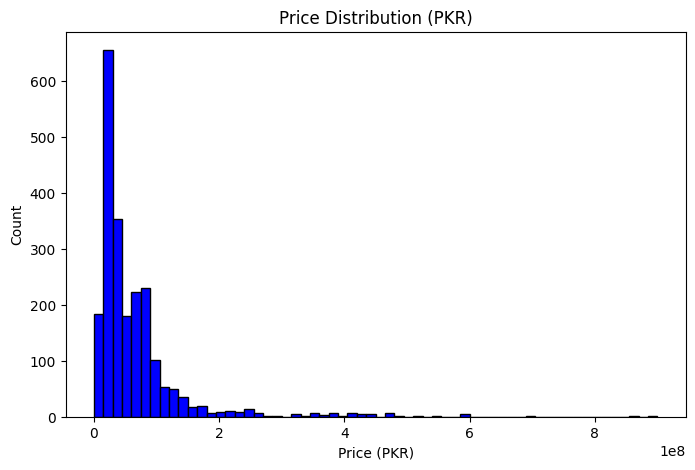

price distribution is right skewed meaning most properties are moderately priced but few are extremely expensive


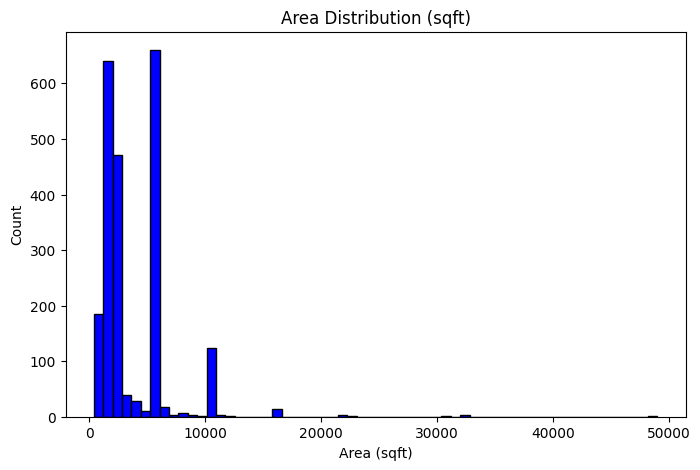

area distribution is skewed with majority of houses being mid-sized while very large plots are rare


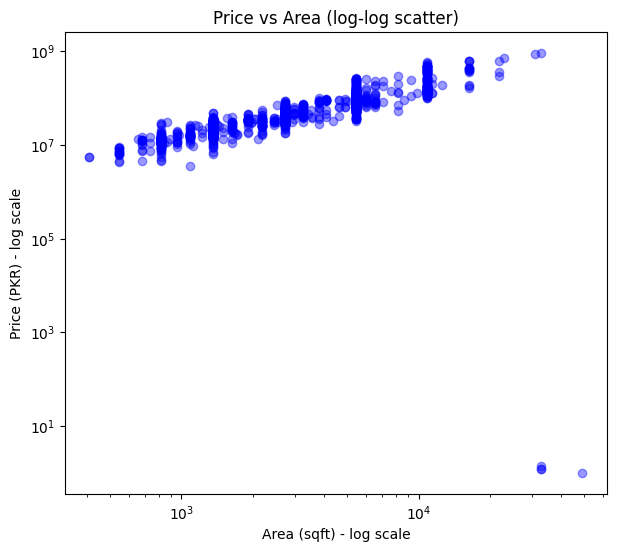

price vs area scatter on log scales shows larger plots generally cost more though the relationship is noisy


C:\Windows\Temp\ipykernel_19612\2587855915.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dt, labels=[str(int(b)) for b in bcats], showfliers=False,


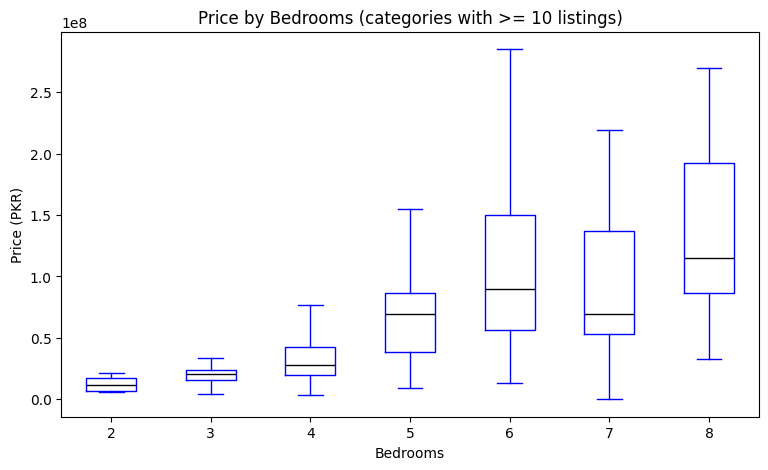

price by bedrooms boxplot indicates houses with more bedrooms usually have higher prices but location still dominates


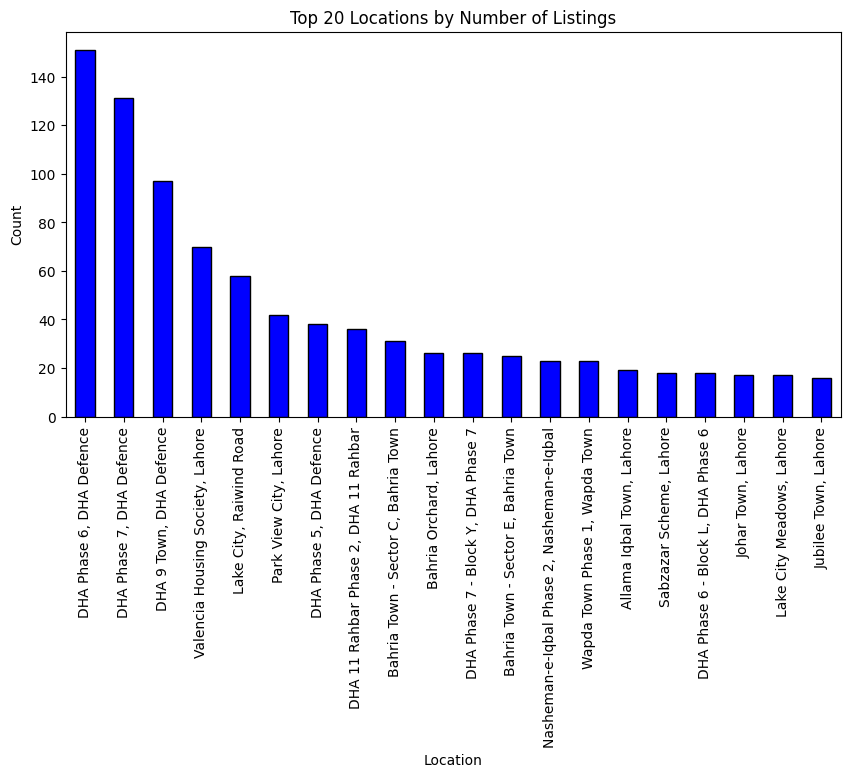

top 20 locations by count highlight dha and gulberg as the most frequently listed neighborhoods


C:\Windows\Temp\ipykernel_19612\2587855915.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dt, labels=top10, showfliers=False,


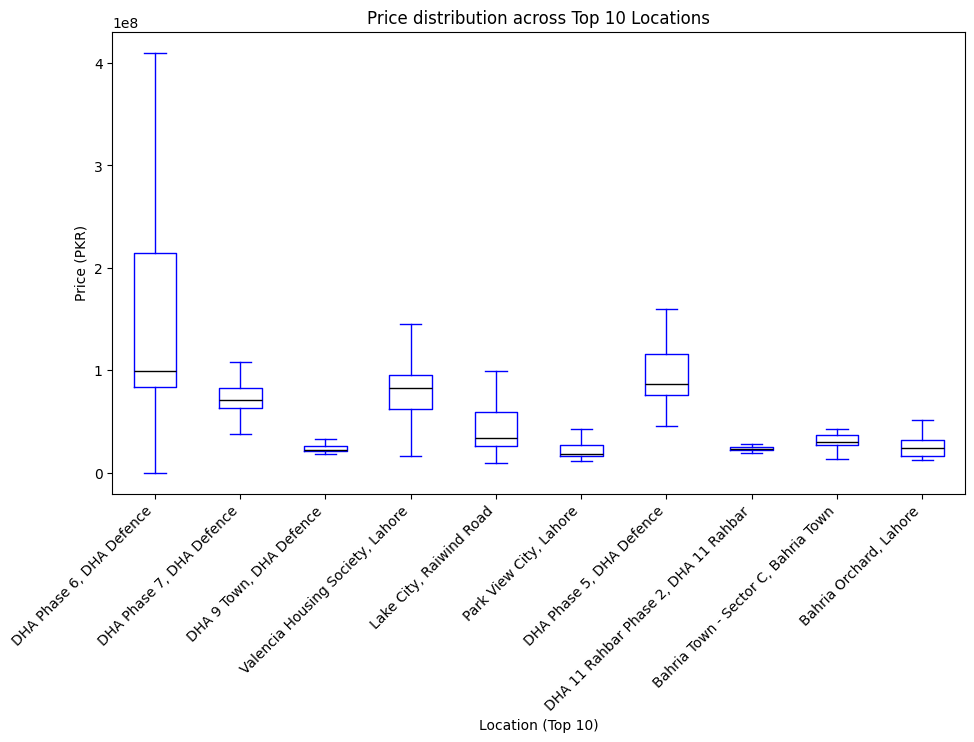

price distribution across top 10 locations shows major variation proving location is a key price driver


<Figure size 1000x600 with 0 Axes>

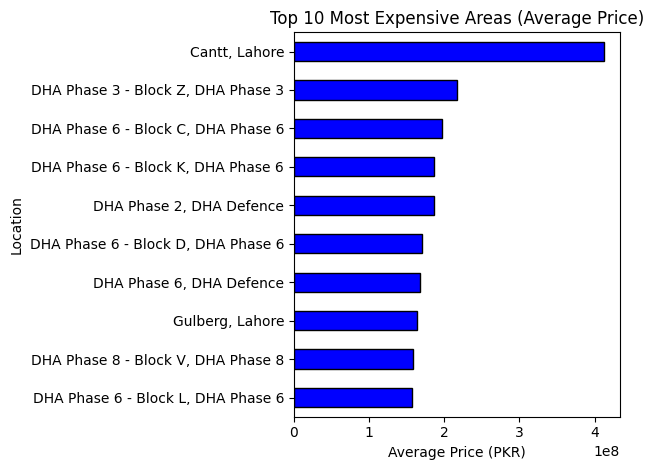

top 10 most expensive areas bar chart confirms premium neighborhoods like cantt and dha phase 6 lead in price


<Figure size 1000x600 with 0 Axes>

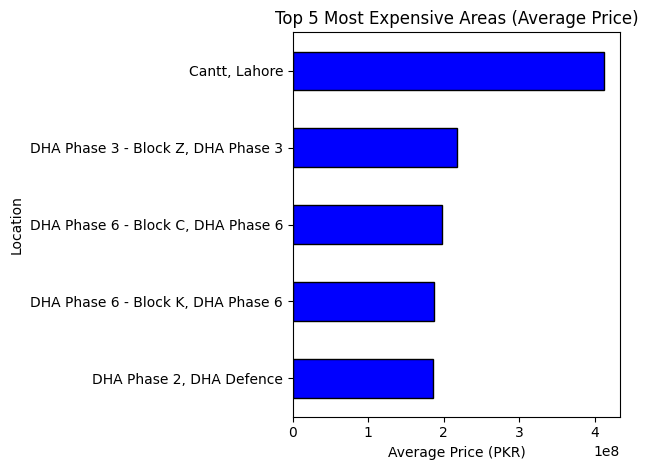

top 5 most expensive areas chart


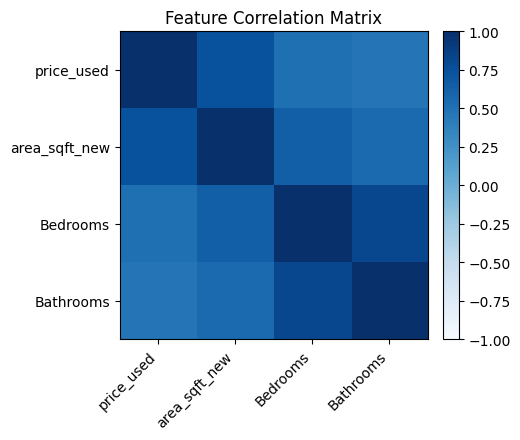

feature correlation matrix shows price is strongly correlated with area and moderately with bedrooms and bathrooms


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dff = pd.read_csv("zameen_clean.csv")

dff['price_used'] = pd.to_numeric(dff['price_used'], errors='coerce')
dff['area_sqft_new'] = pd.to_numeric(dff['area_sqft_new'], errors='coerce')
if 'Bedrooms' in dff.columns:
    dff['Bedrooms'] = pd.to_numeric(dff['Bedrooms'], errors='coerce')
if 'Bathrooms' in dff.columns: 
    dff['Bathrooms'] = pd.to_numeric(dff['Bathrooms'], errors='coerce')

plt.figure(figsize=(8,5))
plt.hist(dff['price_used'].dropna(), bins=60, color="blue", edgecolor="black")
plt.title("Price Distribution (PKR)")
plt.xlabel("Price (PKR)")
plt.ylabel("Count")
plt.show()
print("price distribution is right skewed meaning most properties are moderately priced but few are extremely expensive")

plt.figure(figsize=(8,5))
plt.hist(dff['area_sqft_new'].dropna(), bins=60, color="blue", edgecolor="black")
plt.title("Area Distribution (sqft)")
plt.xlabel("Area (sqft)")
plt.ylabel("Count")
plt.show()
print("area distribution is skewed with majority of houses being mid-sized while very large plots are rare")

plt.figure(figsize=(7,6))
plt.scatter(dff['area_sqft_new'], dff['price_used'], alpha=0.4, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Area (sqft) - log scale")
plt.ylabel("Price (PKR) - log scale")
plt.title("Price vs Area (log-log scatter)")
plt.show()
print("price vs area scatter on log scales shows larger plots generally cost more though the relationship is noisy")

if 'Bedrooms' in dff.columns:
    xx = dff[dff['Bedrooms'].between(0,10,inclusive="both")]
    bb = xx['Bedrooms'].value_counts()
    bcats = bb[bb>=10].index.sort_values()
    if len(bcats) > 0:
        dt = [xx[xx['Bedrooms']==b]['price_used'] for b in bcats]
        plt.figure(figsize=(9,5))
        plt.boxplot(dt, labels=[str(int(b)) for b in bcats], showfliers=False,
                    boxprops=dict(color="blue"), whiskerprops=dict(color="blue"),
                    capprops=dict(color="blue"), medianprops=dict(color="black"))
        plt.xlabel("Bedrooms")
        plt.ylabel("Price (PKR)")
        plt.title("Price by Bedrooms (categories with >= 10 listings)")
        plt.show()
        print("price by bedrooms boxplot indicates houses with more bedrooms usually have higher prices but location still dominates")

if 'Location' in dff.columns:
    lcts = dff['Location'].value_counts().head(20)
    plt.figure(figsize=(10,5))
    lcts.plot(kind="bar", color="blue", edgecolor="black")
    plt.title("Top 20 Locations by Number of Listings")
    plt.xlabel("Location")
    plt.ylabel("Count")
    plt.show()
    print("top 20 locations by count highlight dha and gulberg as the most frequently listed neighborhoods")

if 'Location' in dff.columns:
    top10 = dff['Location'].value_counts().head(10).index.tolist()
    subb = dff[dff['Location'].isin(top10)]
    dt = [subb[subb['Location']==loc]['price_used'] for loc in top10]
    plt.figure(figsize=(11,6))
    plt.boxplot(dt, labels=top10, showfliers=False,
                boxprops=dict(color="blue"), whiskerprops=dict(color="blue"),
                capprops=dict(color="blue"), medianprops=dict(color="black"))
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Location (Top 10)")
    plt.ylabel("Price (PKR)")
    plt.title("Price distribution across Top 10 Locations")
    plt.show()
    print("price distribution across top 10 locations shows major variation proving location is a key price driver")

ll = dff.groupby('Location')['price_used'].agg(['count','mean']).dropna()
ll = ll[ll['count'] >= 5]
tt = ll.sort_values('mean', ascending=False).head(10)
plt.figure(figsize=(10,6))
tt.sort_values('mean').plot(kind='barh', y='mean', color='blue', edgecolor='black', legend=False)
plt.title("Top 10 Most Expensive Areas (Average Price)")
plt.xlabel("Average Price (PKR)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()
print("top 10 most expensive areas bar chart confirms premium neighborhoods like cantt and dha phase 6 lead in price")

tt = ll.sort_values('mean', ascending=False).head(5)
plt.figure(figsize=(10,6))
tt.sort_values('mean').plot(kind='barh', y='mean', color='blue', edgecolor='black', legend=False)
plt.title("Top 5 Most Expensive Areas (Average Price)")
plt.xlabel("Average Price (PKR)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()
print("top 5 most expensive areas chart")

corr = dff[['price_used','area_sqft_new']].copy()
if 'Bedrooms' in dff.columns: 
    corr['Bedrooms'] = dff['Bedrooms']
if 'Bathrooms' in dff.columns: 
    corr['Bathrooms'] = dff['Bathrooms']
cm = corr.corr()

plt.figure(figsize=(5,4))
im = plt.imshow(cm.values, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
ticks = range(len(cm.columns))
plt.xticks(ticks, cm.columns, rotation=45, ha="right")
plt.yticks(ticks, cm.columns)
plt.title("Feature Correlation Matrix")
plt.show()
print("feature correlation matrix shows price is strongly correlated with area and moderately with bedrooms and bathrooms")
